In [38]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

# Technical indicator library
import talib as ta

# Data import library
import yfinance as yf

#Data visualisation
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import plotly.graph_objs as go
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
#sys.path.append('c:/Users/ivanz/Documents/trading/SVM_ALGO/')
from utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading Prepared Data from CSV file

In [3]:
df = pd.read_csv('data/data_tesla_4_7.csv', index_col='Datetime')
df.head(2)

,Open,High,Low,Close,Adj Close,Volume,RSI,SMA,Corr,SAR,...,return1,return2,return3,return4,return5,return6,return7,return8,return9,Signal
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-04-07 09:50:00-04:00,1056.0,1061.459961,1054.780029,1061.459961,1061.459961,129917,46.306417,1058.645520,-0.227120,1058.822852,...,-0.001418,0.000473,0.000000,0.0,-0.000473,0.000947,-0.007049,0.003774,-0.000471,1
2022-04-07 09:51:00-04:00,1064.0,1064.255005,1064.000000,1064.255005,1064.255005,145228,57.959299,1058.512512,-0.145133,1054.114258,...,0.007576,-0.001418,0.000473,0.0,0.000000,-0.000473,0.000947,-0.007049,0.003774,1


In [4]:
# Create a variable split that stores 80% of the length of the dataframe
t = .49
split = int(t*len(df))
split

371

### Data Cleaning

In [6]:
# Use drop method to drop the columns
X = df.drop(['Close', 'Signal', 'High', 'Low', 'Volume', 'Ret', 'Adj Close'], axis=1)
# Create a variable which contains all the 'Signal' values
Y = df['Signal']

In [7]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X[:split])
X_test = sc.fit_transform(X[split:])

In [9]:
len(df.columns)

32

In [18]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(54, input_dim=25, activation='relu'))
	model.add(Dense(27, activation='relu'))
	model.add(Dense(12, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [19]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [20]:
# kfold = KFold(n_splits=10, shuffle=True)

In [21]:
estimator.fit(X_train, Y[:split])

In [22]:
predictions = estimator.predict(X_test)
predictions

array([-1, -1, -1,  0, -1, -1,  0,  0,  1,  0,  1,  1,  0, -1,  1,  0,  1,
        0, -1, -1, -1, -1,  0, -1,  0,  1,  0,  1,  0,  1, -1,  1, -1,  0,
        1, -1, -1,  1,  1, -1, -1,  0,  0,  1, -1,  0, -1,  1,  1, -1,  1,
       -1, -1,  0, -1,  1,  1,  0,  0,  0,  1, -1, -1, -1,  1, -1, -1, -1,
        1,  1,  1,  1,  0, -1, -1,  1, -1, -1, -1,  1,  1,  0, -1,  1,  1,
       -1, -1,  1,  1, -1,  1,  0, -1, -1,  0, -1,  1,  0,  1, -1,  1, -1,
        1, -1, -1,  0,  1, -1,  0, -1,  0, -1, -1,  1,  1,  0,  0,  1,  0,
        1,  1, -1,  1,  0, -1, -1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  1,
        0,  1, -1,  1, -1, -1,  0,  0,  0,  1,  0, -1,  0,  1,  1, -1,  1,
       -1,  1,  1,  0,  0,  0,  1,  0, -1,  0,  1, -1,  1,  1,  0,  1,  1,
        1,  0, -1,  1,  1, -1, -1,  1,  1, -1, -1,  0,  1, -1, -1,  1, -1,
        0,  1,  0, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  0,  1,
        0,  0,  1,  0, -1, -1, -1, -1,  0,  1, -1, -1,  1,  0,  0,  0, -1,
        1,  1,  0,  0,  0

In [23]:
cm = confusion_matrix(Y[split:], predictions)
cm

array([[91, 27,  6],
       [26, 78, 43],
       [ 2, 16, 99]], dtype=int64)

In [24]:
cr = classification_report(Y[split:], predictions)
print(cr)

              precision    recall  f1-score   support

          -1       0.76      0.73      0.75       124
           0       0.64      0.53      0.58       147
           1       0.67      0.85      0.75       117

    accuracy                           0.69       388
   macro avg       0.69      0.70      0.69       388
weighted avg       0.69      0.69      0.69       388



### Create hyperparameters optimal search function for SVC algorithm

### Apply RendomizedSearch to train data for best params

### Train Classifier with best params

### Predictions on test Set

In [25]:
# # Pass the test data to the predict function and store the values into 'y_predict'
# y_predict = cls.predict(ss1.transform(X.iloc[split:]))

# Initiate a column by name, 'Pred_Signal' and assign 0 to it
df['Pred_Signal'] = 0

In [27]:
# y_predict

In [28]:
# # Save the predicted values for the train data
# df.iloc[:split, df.columns.get_loc('Pred_Signal')] = pd.Series(
#     cls.predict(ss1.transform(X.iloc[:split])).tolist())

# Save the predicted values for the test data
df.iloc[split:, df.columns.get_loc('Pred_Signal')] = predictions

In [29]:
# Calculate strategy returns and store them in 'Ret1' column
df['Ret1'] = df['Ret']*df['Pred_Signal']
# Calculate the confusion matrix
# cm = confusion_matrix(y[split:], y_predict)
# cm

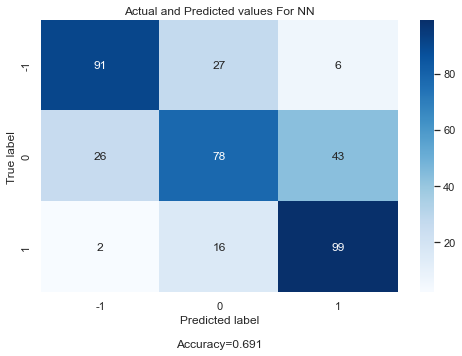

In [30]:
make_confusion_matrix(cf=cm, 
                      categories=['-1', '0', '1'], figsize=(8,5), percent=False,
                      title="Actual and Predicted values For NN")

In [54]:
# # Calculate the classification report
cr = classification_report(y[split:], y_predict)
print(cr)
#declare figure
fig = go.Figure()
#Set up traces
fig.add_trace(go.Scatter(x=df[split:].index, y= (df['Ret'][split:]+1).cumprod(),line=dict(color='royalblue', width=.8), name = 'stock_returns'))
fig.add_trace(go.Scatter(x=df[split:].index, y= (df['Ret1'][split:]+1).cumprod(),line=dict(color='orange', width=.8), name = 'strategy_returns'))
# Add titles
fig.update_layout(
    title='Support Vector Machine Strategy',
    yaxis_title='Stock return (% Return)')

TypeError: 'float' object is not subscriptable

### Look At Model Predictions

In [32]:
df_pred = df[split:].copy()
df_pred = df_pred.reset_index()

df_pred.Pred_Signal = df_pred.Pred_Signal.astype(int)
df_pred.Datetime = df_pred.Datetime.apply(lambda x: x[:-6])

df_pred['Open_shift'] = df_pred['Open']-2
df_pred['Pred_Signal_switch'] = correct_signals(df_pred['Pred_Signal'])
df_pred['Signal_switch'] = correct_signals(df_pred['Signal'])
df_pred['Signal_m'] = df_pred['Signal'].apply(lambda x: ' ' if x==0 else x)
df_pred['Pred_Signal_m'] = df_pred['Pred_Signal'].apply(lambda x: ' ' if x==0 else x)
df_pred['Pred_Signal_switch'] = df_pred['Pred_Signal_switch'].apply(lambda x: ' ' if x==0 else x)
df_pred['Signal_switch'] = df_pred['Signal_switch'].apply(lambda x: ' ' if x==0 else x)

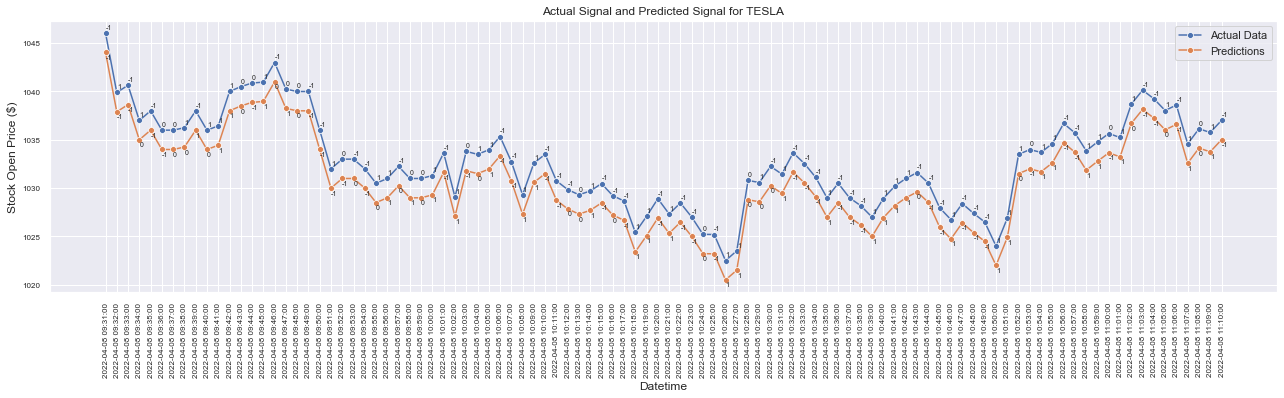

In [40]:
plot_predict_signal(df_pred[:100], col_orig_signal='Signal', col_pred_signal='Pred_Signal', figsize=(22,5))

### Excluding Hold Signals(Signal ==0)

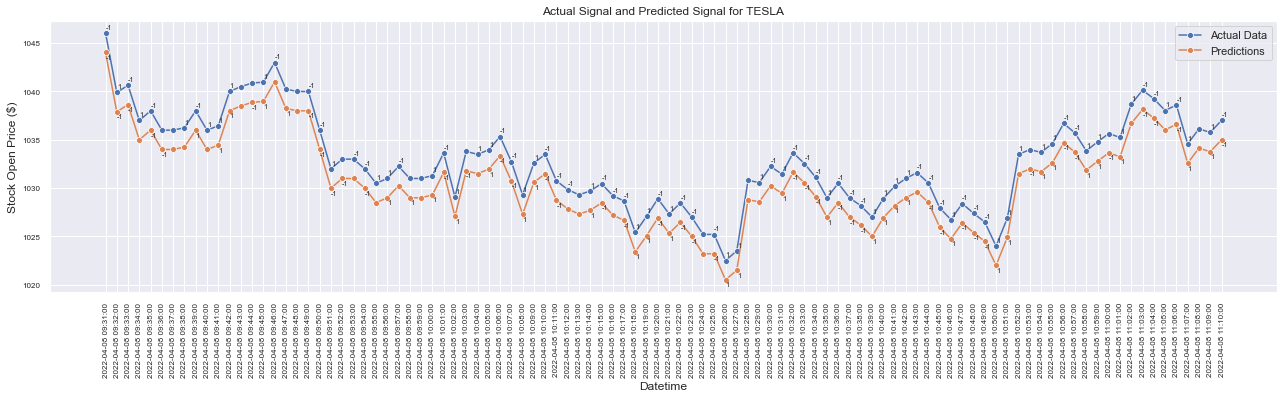

In [41]:
# Excluding Hold Position Signal (0)
plot_predict_signal(df_pred[:100], col_orig_signal='Signal_m', col_pred_signal='Pred_Signal_m', figsize=(22,5))

### Ordering Signals for Buy and Sell

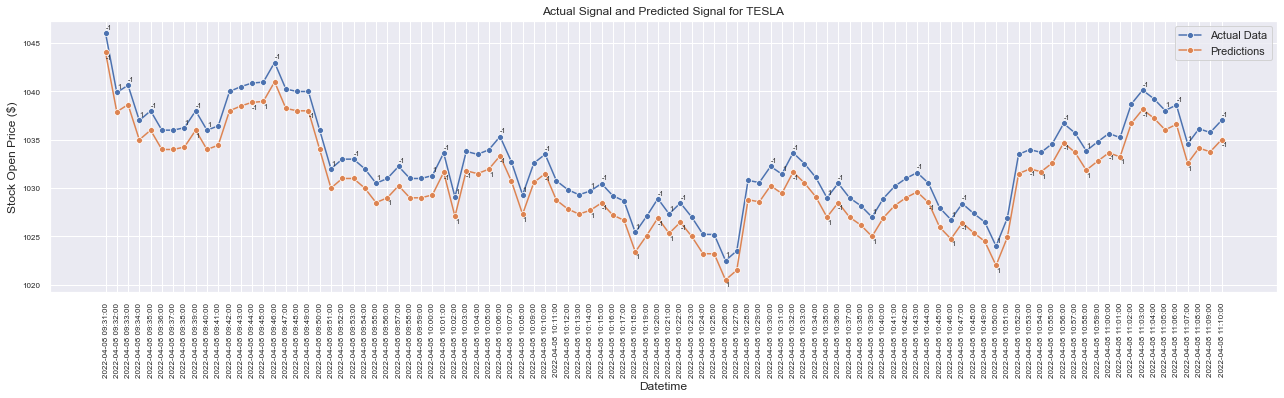

In [43]:
# Structurize Signal (111-11-1)-(1-1-1)
plot_predict_signal(df_pred[:100], col_orig_signal='Signal_switch', col_pred_signal='Pred_Signal_switch', figsize=(22,5))

In [46]:
df_pred_ret = df_pred[['Datetime','Open', 'Pred_Signal_switch']]
df_pred_ret = df_pred_ret[df_pred_ret['Pred_Signal_switch'].isin([-1,1])]

# calculate pct return at each switch signal
df_pred_ret['Return'] = 100*df_pred_ret['Open'].pct_change()
df_pred_ret['Return'] = np.where(df_pred_ret['Pred_Signal_switch']==-1, df_pred_ret['Return'], np.nan)
df_pred_ret= df_pred_ret.reset_index(drop=True)

df_pred_ret['cumul_compaund_return'] =  (1 + df_pred_ret.Return).cumprod() - 1  # (df_pred_ret['Return']+1000).cumprod()
# df_pred_ret['cumul_compaund_return'].iloc[0] = 1000
#df_pred_ret=df_pred_ret.fillna(0)
df_pred_ret['cum_sum_return'] = df_pred_ret['Return'].cumsum()

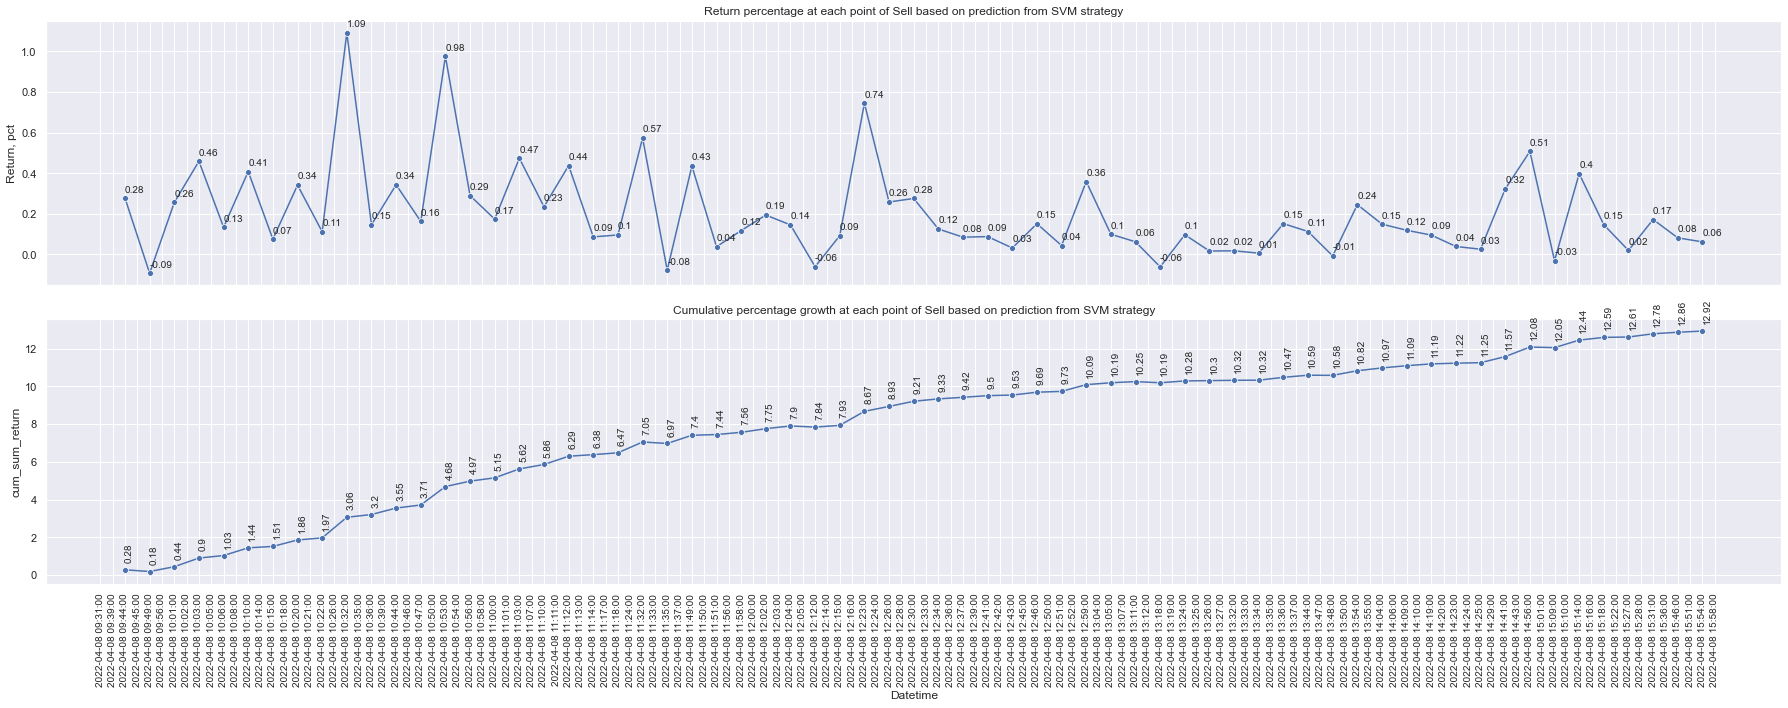

In [57]:
fig, ax = plt.subplots(2,1, figsize=(25,10))

ax[0].set_title('Return percentage at each point of Sell based on prediction from SVM strategy')
ax[0].set_ylabel('Return, pct')
plt.setp(ax[0].get_xticklabels(), visible=False)
sns.lineplot(x='Datetime', y='Return', data=df_pred_ret, marker='o', ax=ax[0])
for xx,yy,m in df_pred_ret[['Datetime','Return','Return']].dropna().values:
        ax[0].text(xx,yy+0.03,round(m,2), size =10)

ax[1].set_title('Cumulative percentage growth at each point of Sell based on prediction from SVM strategy')
plt.setp(ax[1].get_xticklabels(), rotation=90, size =10)
sns.lineplot(x='Datetime', y='cum_sum_return', data=df_pred_ret, marker='o', ax=ax[1])
for xx,yy,m in df_pred_ret[['Datetime','cum_sum_return','cum_sum_return']].dropna().values:
        ax[1].text(xx,yy+0.5,round(m,2), size =10, rotation =90)
        
plt.tight_layout()
plt.show()

In [52]:
df_pred_ret.cum_sum_return.max()

12.924292513292798

In [58]:
df_pred_ret.Pred_Signal_switch.value_counts()

-1    66
 1    66
Name: Pred_Signal_switch, dtype: int64

In [50]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)